# Predicting Medical Expenses Using Linear Regression
1. A typical problem statement for machine learning
2. Downloading and exploring a dataset for machine learning
3. Linear regression with one variable using Scikit-learn
4. Linear regression with multiple variables
5. Using categorical features for machine learning
6. Regression coefficients and feature importance
7. Other models and techniques for regression using Scikit-learn
8. Applying linear regression to other datasets

## Problem Statement
QUESTION: ACME insurance Inc. offers affordable health insurance to thousands of customer all over the US. As the lead data scientist at ACM, you are asked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

**Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer**. Due to regulatory requirements, you must be able to explain why **your system outputs a certain prediction**.

## Downloading the Data

In [718]:
# restart the kernel after installing
#%pip install pandas-profiling --quiet

In [719]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [720]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x2c1740330d0>)

In [721]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [722]:
medical_df.info()
# No data is msssing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [723]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 

## Divide the data into test and train 


In [724]:
X = medical_df.drop('charges', axis=1) # drop charge (y) from the dataset
y = medical_df.charges

In [725]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=X.age, # to avoid bias in dataset
                                                    random_state=42)

## Exploratory Analysis and Visualization

Explore the data by visualizing the distribution of values in some columns of the dataset
and the relationships between charges and other columns

In [726]:
#%pip install plotly

In [727]:
# Import required libs
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [728]:
# to impove default style and font size of the charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [729]:
X_test.age.describe()

count    268.000000
mean      38.914179
std       14.062864
min       18.000000
25%       26.000000
50%       39.000000
75%       51.000000
max       64.000000
Name: age, dtype: float64

Observations
1. Min age is 18
2. Max age 64

In [730]:
fig = px.histogram(X_train,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution  of Age')
fig.update_layout(bargap=0.1)


It seems people with age 18 and 19 have highest number of insurance. 

### BMI

In [731]:
fig = px.histogram(X_train,
                   x='bmi',
                   marginal='box',
                   nbins=47,
                   title='Distribution  of BMI')
fig.update_layout(bargap=0.1)

Observations
1. It form Gaussian distribution
2. People between 25 to 38 are having highest BMI than rest
3. There are few outliers on the end of distribution 

### Charges

In [732]:
charges_df= pd.DataFrame(y_train, columns=['charges'])
charges_df['smoker'] = X_train.smoker

In [733]:
fig = px.histogram(
    charges_df,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green', 'grey'],
    title='Annual Medical Charges'
)
fig.update_layout(bargap=0.1)


Observation
1. major customers' (and who are non-smoker) medical charges are under 10k. 
2. it seems for the customers with smoking habit charges are higher than 10k or maybe due to some illness 
   

EXERCISE: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

### Sex

In [734]:
charges_df= pd.DataFrame(y_train, columns=['charges'])
charges_df['sex'] = X_train.sex

fig = px.histogram(
    charges_df,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=[ 'pink','blue'],
    title='Annual Medical Charges'
)
fig.update_layout(bargap=0.1)

Observations
1. Males charges are higher than female
2. still males and famles' median charges are near to each other

### Region

In [735]:
charges_df['region'] = X_train.region

fig = px.histogram(
    charges_df,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['green', 'grey', 'pink', 'orange'],
    title='Annual Medical Charges'
)
fig.update_layout(bargap=0.1)

Observations
1. Southeast chargies are highest as well as southwest are lowest
2. Northwest and southwest have similer charges

### Smoker

In [736]:
# Visualize smoker yer or no value
charges_df['smoker'] = X_train.smoker
px.histogram(charges_df, x='smoker', color='sex', title='Smoker')

Observation
1. about 20% customers are smokers


EXERCISE: Visualize the distributions of the "sex", "region" and "children" columns and report your observations.

### Sex

In [737]:
px.histogram(charges_df, x='sex', title='Sex')

In [738]:
px.histogram(charges_df, x='region', title='Region')

Observation
1. It seems highest customers are from southeast and rest of region have same number of customers

In [739]:
charges_df['children'] = X_train.children
px.histogram(charges_df, x='children', title='Children')

Observation
1. It seems highest customers do not have kids, that can be explainable because highest number of customers are with 18, 19 age
2. very less customers have 5 children

### Ages and Charges

In [740]:
fig = px.scatter(
    X_train,
    x='age',
    y=charges_df.charges,
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs. Charges'   
)
fig.update_layout(
    yaxis_title='charges'
)
fig.update_traces(marker_size=7)

Observations
1. with non smoker we have linear trend of charges from 10k to 60k and possibly there are some unfortunate people with highe charges because of some accidents or illneses.
2. where as smoker doe not have that much linear trend but they are generally paying higher charges than non smokers, possibly their issue worsended by smoking

### BMI and Charges

In [741]:
fig = px.scatter(
    X_train,
    x='bmi',
    y=charges_df.charges,
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='BMI vs. Charges'   
)
fig.update_layout(
    yaxis_title='charges'
)
fig.update_traces(marker_size=7)

Observations
1. It appears that, smokers with higher thatn 30 bmi are paying higher charges
2. Maybe smoking and obesity are worst for health

EXERCISE: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.

Hint: Use violin plots (px.violin) and bar plots (sns.barplot)

### Children vs Charges

<AxesSubplot:xlabel='children', ylabel='charges'>

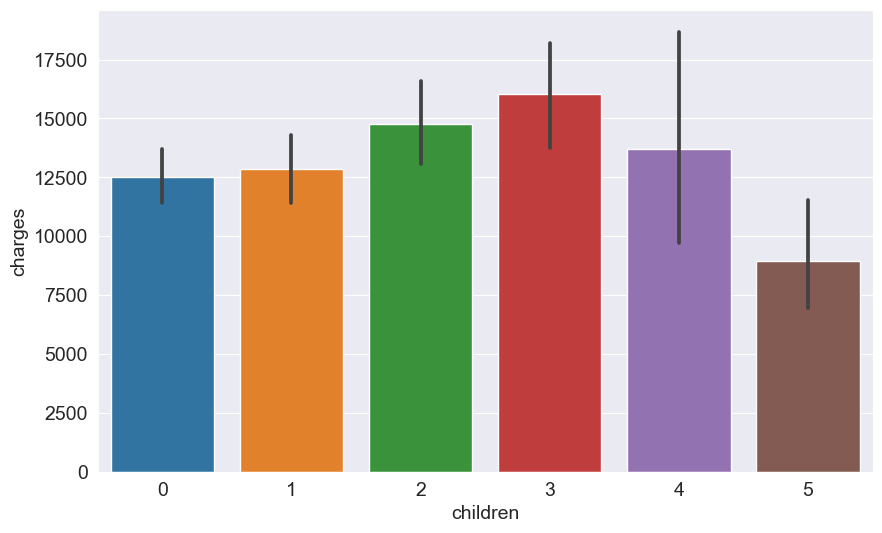

In [742]:
sns.barplot(
    X_train,
    x='children',
    y=charges_df.charges,
)

Observations
1. for some reason, people with 2 to 4 children is paying higher charges
2. People with 5 children are paying lowest charges

### Sex vs Charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

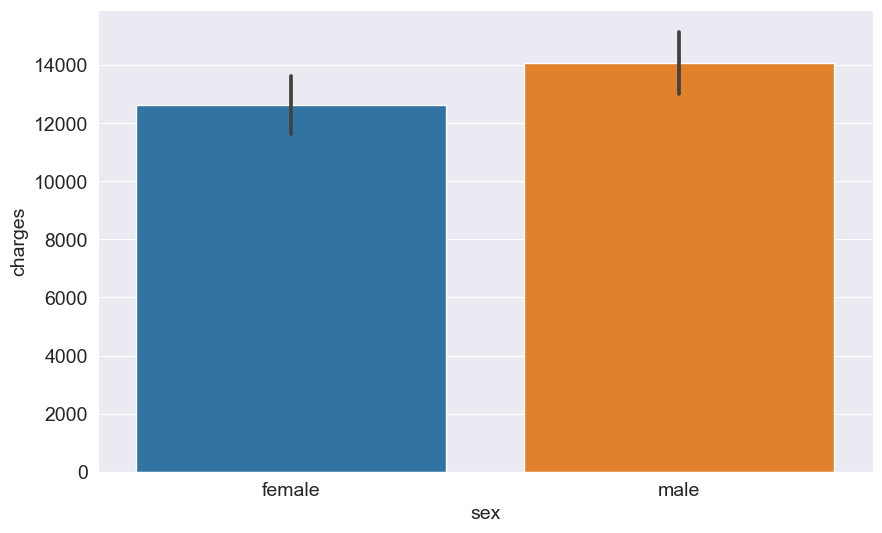

In [743]:
sns.barplot(
    X_train,
    x='sex',
    y=charges_df.charges,
)

Observation
1. males are paying higher charges than female

### Region vs Charges

<AxesSubplot:xlabel='region', ylabel='charges'>

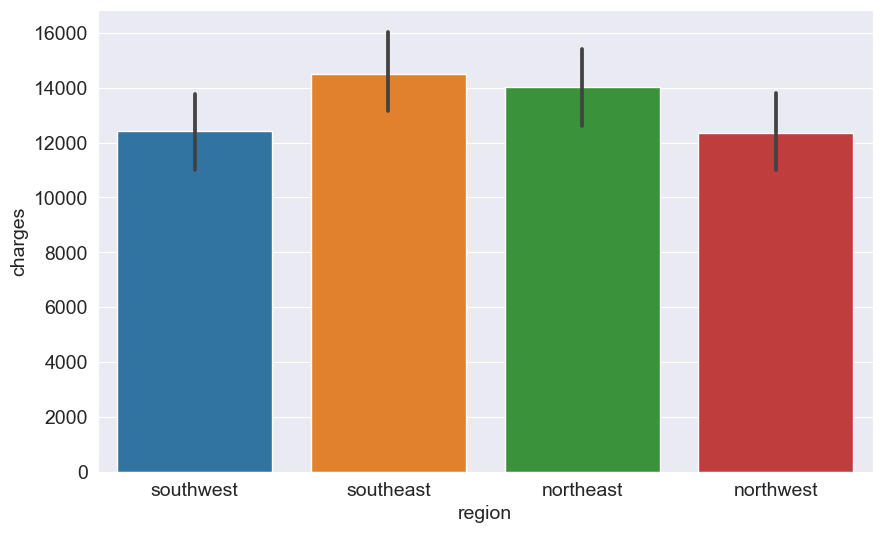

In [744]:
sns.barplot(
    X_train,
    x='region',
    y=charges_df.charges,
)

Observations
1. People living at southeast and northeast are paying higher charges than rest

<AxesSubplot:xlabel='smoker', ylabel='charges'>

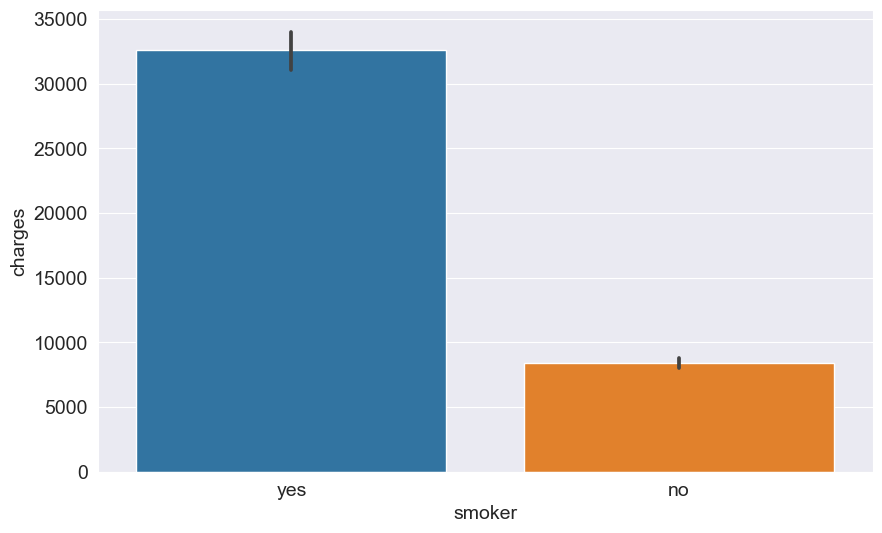

In [745]:
sns.barplot(
    X_train,
    x='smoker',
    y=charges_df.charges,
)

In [746]:


cols = ["children", "sex", "region", "smoker"]

px.violin(X_train,
          x='smoker',
          y=charges_df.charges,
          box=True,
          color='sex',
          points='all',
          hover_data=X_train.columns
          )


In [747]:
px.violin(charges_df, x='children', y='charges')

## Correlation

In [748]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [749]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362884

In [750]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

To compute the correlation for categorical columns, they must be converted into numeric columns first

In [751]:
smoker_values = {'no':0, 'yes':1}
# .map function either takes function or dict and it applies it to every value
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984767

In [752]:
# find charges corelation with all the columns
corr_matrix = medical_df.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

<AxesSubplot:>

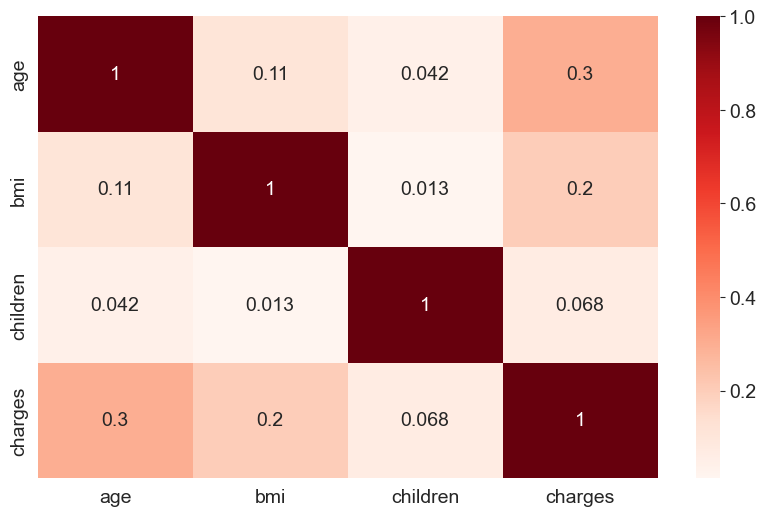

In [753]:
sns.heatmap(corr_matrix, cmap='Reds',annot=True)

# Linear Regression using a Single Feature

* smoker and age columns have the strongest correlation with 'charges'
* find a way to estimate the charges using value of age for non-smokers

In [754]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<AxesSubplot:title={'center':'Age vs. Charges'}, xlabel='age', ylabel='charges'>

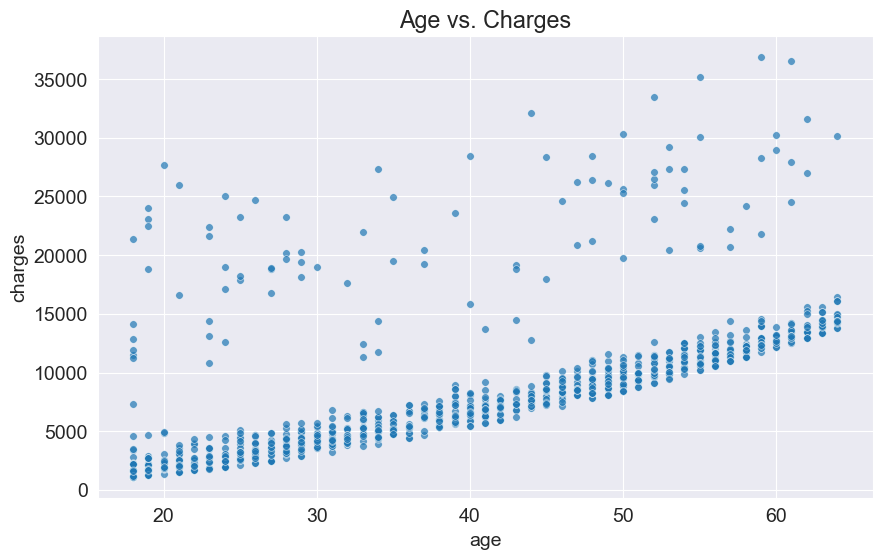

In [755]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=30)

## Linear Regression using Scikit-learn

In [756]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [757]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [758]:
model.fit(inputs, targets)

LinearRegression()

In [759]:
predictions = model.predict(inputs)

In [760]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [761]:
rmse(targets, predictions)

4662.505766636395

EXERCISE: Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

In [762]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [763]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
sgd_clf_pipe = make_pipeline(StandardScaler(),
                             sgd_clf)

In [764]:
targets = targets.astype('int')

In [765]:
sgd_clf_pipe.fit(inputs, targets)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [766]:
sgd_predictions = sgd_clf_pipe.predict(inputs)

In [767]:
rmse(targets, sgd_predictions)

5980.319641386896

## Linear Regression using Multiple Features
now adding bmi feature 

In [768]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
loss

4662.3128354612945

* adding BMI did not create huge difference because of correlation with charges

In [769]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [770]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
loss

4608.470405038247

* Using all the dataset

In [771]:
# Create and train the model
model_pipe = make_pipeline(StandardScaler(),
                           LinearRegression())
# Generate predictions
model_pipe.fit(X_train[['age', 'bmi', 'children']], y_train)
predictions = model_pipe.predict(X_test[['age', 'bmi', 'children']])

# Compute loss to evalute the model
loss = rmse(y_test, predictions)
loss

10585.378167430488

## Using Categorical Features for Machine Learning

In [772]:
# Handle smoker column
smoker_codes = {'no': 0, 'yes': 1}
X_train['smoker_code'] = X_train.smoker.map(smoker_codes)
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
X_test['smoker_code'] = X_test.smoker.map(smoker_codes)

In [773]:
X_train

,age,sex,bmi,children,smoker,region,smoker_code
1218,46,female,34.600,1,yes,southwest,1
669,40,female,29.810,1,no,southeast,0
618,19,female,33.110,0,yes,southeast,1
58,53,female,22.880,1,yes,southeast,1
902,26,male,27.265,3,no,northeast,0
...,...,...,...,...,...,...,...
165,47,male,28.215,4,no,northeast,0
367,42,female,24.985,2,no,northwest,0
1035,54,female,23.000,3,no,southwest,0
56,58,female,31.825,2,no,northeast,0


In [774]:
medical_df.charges.corr(X_train.smoker_code)

# it is highly correlative to the charges column

0.8000936780855522

In [775]:
# Create and train the model
model = LinearRegression().fit(X_train[['age', 'bmi', 'children', 'smoker_code']], y_train)

# Generate predictions
predictions = model.predict(X_test[['age', 'bmi', 'children', 'smoker_code']])

# Compute loss to evalute the model
loss = rmse(y_test, predictions)
print('Loss:', loss)

Loss: 6284.456747242094


In [776]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [777]:
# Handle sex column
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [778]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025366

## One-hot Encoding


In [779]:
from sklearn.preprocessing import OneHotEncoder

In [780]:
enc = OneHotEncoder()
enc.fit(medical_df[['region']]) # just identify the column's categorical values
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [781]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [782]:
# add One hot encoded data into the df
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [783]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

In [784]:
# standarization
from sklearn.preprocessing import StandardScaler

In [785]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [786]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [787]:
# combine numerical and categorical data
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

In [788]:
# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.801444664585


In [789]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


## Combining everything using pipeline

In [790]:
medical_df = pd.read_csv('medical.csv')

In [791]:
# handle all the numerical and categorical columns separately
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numeric_cols

['age', 'bmi', 'children']

In [792]:
# get categorical columns
categorical_cols = [col for col in medical_df.columns if medical_df[col].dtype in ['object']]
categorical_cols

['sex', 'smoker', 'region']

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=X.age, # to avoid bias in dataset
                                                    random_state=42)

In [794]:
from sklearn.compose import ColumnTransformer

xformer = ColumnTransformer(
    transformers=[
        ('cat_cols', OneHotEncoder(drop='first', sparse=False), categorical_cols),
        ('num_cols', StandardScaler(), numeric_cols),
    ]
)

In [795]:
from sklearn.pipeline import Pipeline

model_pipe = Pipeline(
    steps=[
        ('xformer', xformer),
        ('model', LinearRegression())
    ]
)

In [796]:
X_train

,age,sex,bmi,children,smoker,region
1218,46,female,34.600,1,yes,southwest
669,40,female,29.810,1,no,southeast
618,19,female,33.110,0,yes,southeast
58,53,female,22.880,1,yes,southeast
902,26,male,27.265,3,no,northeast
...,...,...,...,...,...,...
165,47,male,28.215,4,no,northeast
367,42,female,24.985,2,no,northwest
1035,54,female,23.000,3,no,southwest
56,58,female,31.825,2,no,northeast


In [797]:
y_train

1218    41661.60200
669      6500.23590
618     34439.85590
58      23244.79020
902      4661.28635
           ...     
165     10407.08585
367      8017.06115
1035    12094.47800
56      13607.36875
1172    11093.62290
Name: charges, Length: 1070, dtype: float64

In [798]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('xformer',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num_cols', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', LinearRegression())])

In [799]:
predicted_test = model_pipe.predict(X_test)

In [800]:
# Compute loss to evalute the model
loss = rmse(y_test, predicted_test)
print('Test Loss:', loss)

Test Loss: 6291.1004648092185


# Reference 
https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn